<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/TareasEnClases/Tarea8_SimPy_SED_Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica Propuesta- SimPy SED

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado
* Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.



### Instalacion de Libreria

In [ ]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Quitar el tiempo compartido y definir cada uno para ellos

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 2
# Tiempo de simulación
TIEMPO_SIMULACION = 60
#Tipos de Vehiculos
TIPOS_VEHICULOS = {'Bus':[15, 20, 4], 'Automóvil':[7,10,1], 'Furgoneta':[12, 15, 2]}

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        
        
    def lavar_vehiculo(self, vehiculo, tipoVehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        # ---> Modificamos el tiempo de lavado 5-11
        yield self.env.timeout(random.randint(tipoVehiculo[1][0],tipoVehiculo[1][1]))
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

    def entrada_Vehiculo(self, nombre, tipoVehiculo):
        print('Llega vehiculo: %s de tipo: %s,a la recepcion a la hora %.2f.' % (nombre, tipoVehiculo, env.now))
        # Procesamos la operacion de traslado
        yield env.timeout(tipoVehiculo[1][2])
        # Indicamos que vehiculo ya se ha trasladado
        print('Termina vehiculo: %s de trasladarse en la hora %.2f.' % (nombre, env.now))
    
def llegada_vehiculo(env, nombre, lavanderia, tipoVehiculo):
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        lavanderia.entrada_Vehiculo(nombre,tipoVehiculo)
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre, tipoVehiculo))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))
        # --> Agegamos al diccionario para obtener los tiempos de lavado
        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario

    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo

def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        
        vehiculo = random.choice(list(TIPOS_VEHICULOS.items())) 
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia, vehiculo))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-1, intervalo))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        vehiculo = random.choice(list(TIPOS_VEHICULOS.items())) 
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia, vehiculo))



### Resultado 

In [ ]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 2
# Tiempo de simulación
TIEMPO_SIMULACION = 60
#Tipos de Vehiculos
TIPOS_VEHICULOS = {'Bus':[15, 20, 4], 'Automóvil':[7,10,1], 'Furgoneta':[12, 15, 2]}

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

tiempoCon3Maquinas = tiempo

Lavanderia UPS
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {50%} suciedad vehiculo => Vehiculo-1 
Vehiculo [Vehiculo-1] lavado a las 9.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 9.00.
Removido  {79%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-2] lavado a las 10.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 10.00.
Removido  {84%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-3] lavado a las 19.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 19.00.
Removido  {52%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehiculo-5] lavado a las 26.00.
Entra vehiculo a lavarse: Vehiculo-7 a la hora 26.00.
Removido  {44%} suciedad vehiculo => Vehiculo-4 
Vehiculo [Vehiculo-4] lavado a las 28.00.
Entra vehiculo a lavarse: Vehiculo-8 a la hora 28.00.
Removido  {79%} suciedad vehiculo => Vehiculo-6 
Vehiculo [Vehiculo-6] lavado a las 31.00.
Entra vehicu

In [ ]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 2
# Tiempo de simulación
TIEMPO_SIMULACION = 60
#Tipos de Vehiculos
TIPOS_VEHICULOS = {'Bus':[15, 20, 4], 'Automóvil':[7,10,1], 'Furgoneta':[12, 15, 2]}

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

tiempoCon4Maquina = tiempo

Lavanderia UPS
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 0.00.
Removido  {50%} suciedad vehiculo => Vehiculo-1 
Vehiculo [Vehiculo-1] lavado a las 9.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 9.00.
Removido  {79%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-2] lavado a las 10.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 10.00.
Removido  {84%} suciedad vehiculo => Vehiculo-3 
Removido  {35%} suciedad vehiculo => Vehiculo-4 
Vehiculo [Vehiculo-3] lavado a las 19.00.
Vehiculo [Vehiculo-4] lavado a las 19.00.
Entra vehiculo a lavarse: Vehiculo-7 a la hora 19.00.
Entra vehiculo a lavarse: Vehiculo-8 a la hora 19.00.
Removido  {44%} suciedad vehiculo => Vehiculo-6 
Vehiculo [Vehiculo-6] lavado a las 26.00.
Entra vehiculo a lavarse: Vehiculo-9 a la hora 26.00.
Removido  {77%} suciedad vehiculo => Vehiculo-5 
V

### Graficas

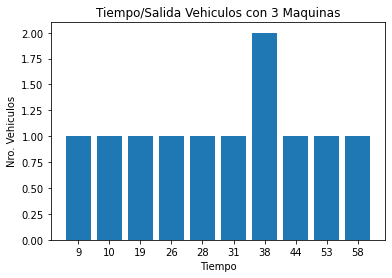

In [ ]:
# Generamos una grafica en base al diccionario del tiempo con 3 maquinas
etiqueta = list(tiempoCon3Maquinas.keys())
valores = list(tiempoCon3Maquinas.values())
plt.bar(range(len(tiempoCon3Maquinas)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos con 3 Maquinas")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()



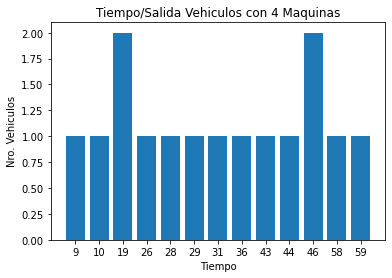

In [ ]:
# Generamos una grafica en base al diccionario del tiempo con 3 maquinas
etiqueta = list(tiempoCon4Maquina.keys())
valores = list(tiempoCon4Maquina.values())
plt.bar(range(len(tiempoCon4Maquina)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos con 4 Maquinas")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()
